## Excutive Summary:
Conversion rate, as one of the most important metrics for E-Commerce platform, always plays an critica role for business. As increasing conversion rate is the most cost-efficient and direct way to inprove revenue. Here with the data from an online store, I performed exploratory data analysis and predictive modeling to provide actionable solutions for this store to boost conversion rate and increase revenue. <br>
Note: This report is for self-learning prupose. The dataset is from book "A Collection of Data Science Take-Home Challenges". Out of respect the author of the original work, please go to https://datamasked.com/ for the original data. 

## Data Description:

**country** : user country based on the IP address  <br>
**age** : user age. Self-reported at sign-in step <br>
**new_user** :
*   1: the user created the account during this session
*   2: had already an account and simply came back to the site

**source** : marketing channel source Ads: came to the site by clicking on an advertisement, seo or direct
*   Ads: came to the site through ads
*   Seo: came to the site by clicking on search results  <br>
*   Direct: came to the site by directly typing the URL on the browser

**total_pages_visited**: number of total pages visited during the session. This is a proxy for time spent on site and engagement during the session <br>
**converted**: this is our label  <br>


*   1 means they converted within the session
*   0 means they left without buying anything


## Goal
To increase conversion rate (# conversions / total sessions)



# Methodology:
1. Input Packages & Data
2. Data Cleaning
3. Exploratory Data Analysis
5. Check Class Imbalance
5. Modeling
6. Result
7. Summary
---



# 1. Input Packages & Data

In [0]:
# input packages
import pandas as pd
import numpy as np
import csv
import time
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix,precision_score, recall_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.inspection import plot_partial_dependence

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# show multiple lines
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity='all'

In [0]:
# import csv as df
df = pd.read_csv('/content/drive/My Drive/1 - Data Science Project/Conversion Rate/conversion_project.csv')
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [0]:
# show unique values for each col:
for column in df.columns:
    uniques = sorted(df[column].unique())
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

country                  4	 ['China', 'Germany', 'UK', 'US']
age                     60	 [17, 18, 19, 20, 21]
new_user                 2	 [0, 1]
source                   3	 ['Ads', 'Direct', 'Seo']
total_pages_visited     29	 [1, 2, 3, 4, 5]
converted                2	 [0, 1]


In [0]:
# Inspect the data with describe() function to catch imperfect data for cleaning
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


## Findings:

1. No null value appear in this dataset
2. Conversion rate at around 3% is industry standard. It makes sense.

3. 50% of users are under 30 yrs old, 75% are under 36. Our user base is young
4. Max age 123 yrs doesn't make sense here

# 2. Data Cleaning

{'boxes': [<matplotlib.lines.Line2D at 0x7f174287bb38>],
 'caps': [<matplotlib.lines.Line2D at 0x7f174288b588>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1742819048>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f174288bc88>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f174287be48>,
  <matplotlib.lines.Line2D at 0x7f174288b208>]}

Text(0.5, 1.0, 'Distribution of age')

Text(0.5, 1.0, 'Age Trend')

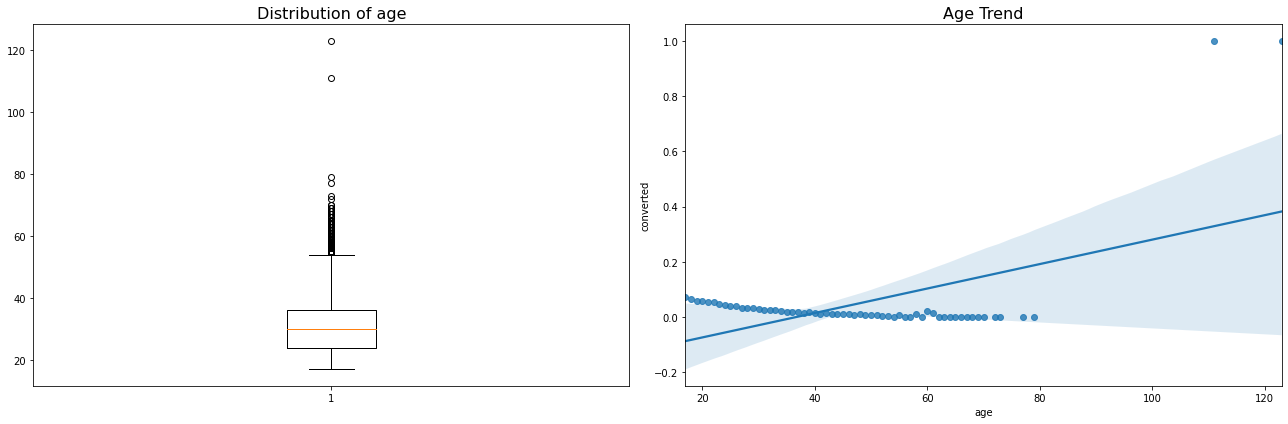

In [0]:
# Let's investigate 'age' with box plot & fit a linear regression model
# box plot is a great choice for outlier detection 
# a linear regression model fit plot will help us understand 
# relationship of explanatory variable and target variable
grouped = df[['converted','age']].groupby('age').mean().reset_index()
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,6))
ax[0].boxplot(x = df['age'])
ax[0].set_title('Distribution of age',fontsize = 16)

sns.regplot(x=grouped['age'], y=grouped['converted'], data = grouped,ax=ax[1])
ax[1].set_title('Age Trend', fontsize = 16)
plt.tight_layout()
plt.show()



## Finding:
2 records of users over 100 years old. This also causes a skew in age trend. Possible reasons could be:
 1. Indicator of some bug with logging code, engineering team could help with this;
 2. Users put wrong data which created outliers

### My solution: remove them

In [0]:
# Show outliers
# Select outlier based on condition
df[df['age']>100]
# Remove outliers, check the final table
df = df[df['age']<100]
df.info()

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316198 non-null  object
 1   age                  316198 non-null  int64 
 2   new_user             316198 non-null  int64 
 3   source               316198 non-null  object
 4   total_pages_visited  316198 non-null  int64 
 5   converted            316198 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.9+ MB


# 3. Exploratory Data Analysis

## Conversion rate by country

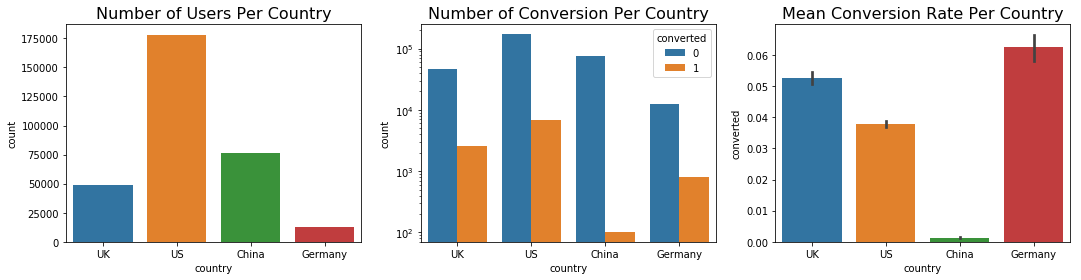

In [0]:
# plot No.users by country, No.converted users by country & mean conversion rate per country

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18,4))

sns.countplot(x='country',data = df,ax = ax[0]) 
ax[0].set_title('Number of Users Per Country',fontsize = 16)

sns.countplot(x='country',hue='converted',data = df,ax = ax[1]) 
ax[1].set_title('Number of Conversion Per Country',fontsize = 16)
ax[1].set_yscale('log')  # set y axis scale in log

sns.barplot(x='country',y='converted',data = df,ax = ax[2])
ax[2].set_title('Mean Conversion Rate Per Country',fontsize = 16)

plt.show()

## Findings:
1. Most users are from US, perhaps this is a US website
2. Germany has the highest conversion rate even though we have the least users there, opportunity!
3. Conversion rate of China is the lowest. Considering large user base of China, we could investigate more about this

## Conversion rate by age

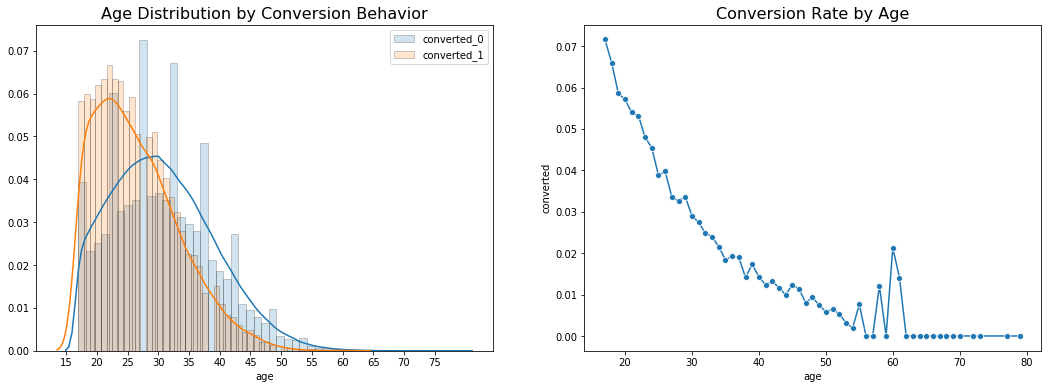

In [0]:
# plot age distribution by conversion behavior, conversion rate by age
grouped = df[['converted','age']].groupby('age').mean().reset_index()

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,6)) 

hist_kws= {'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}  # alpha : transparency 
sns.distplot(df[df['converted']==0]['age'], label = 'converted_0', hist_kws=hist_kws, ax = ax[0])
sns.distplot(df[df['converted']==1]['age'], label = 'converted_1', hist_kws=hist_kws, ax = ax[0])
xticks = np.arange(15, 80, 5)
ax[0].set_xticks(xticks)
ax[0].legend()
ax[0].set_title('Age Distribution by Conversion Behavior',fontsize=16)

sns.lineplot(x=grouped['age'],y=grouped['converted'],data = grouped,ax=ax[1],marker='o')
ax[1].set_title('Conversion Rate by Age',fontsize=16)

plt.show()

## Findings:
1. Age distrributions are right-skewed, no matter converted or not
2. Young users are more inclined to convert

## Conversion rate by user type

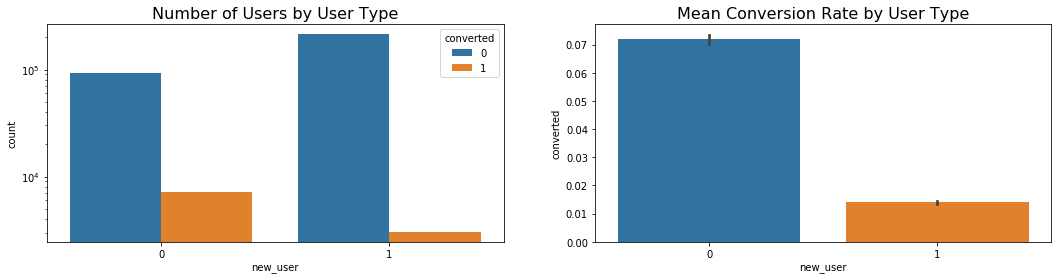

In [0]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,4))

sns.countplot(x='new_user',hue='converted',data = df,ax = ax[0]) 
ax[0].set_title('Number of Users by User Type',fontsize = 16)
ax[0].set_yscale('log')

sns.barplot(x='new_user',y='converted',data = df,ax = ax[1])
ax[1].set_title('Mean Conversion Rate by User Type',fontsize = 16)
plt.show()

## Conversion rate by source

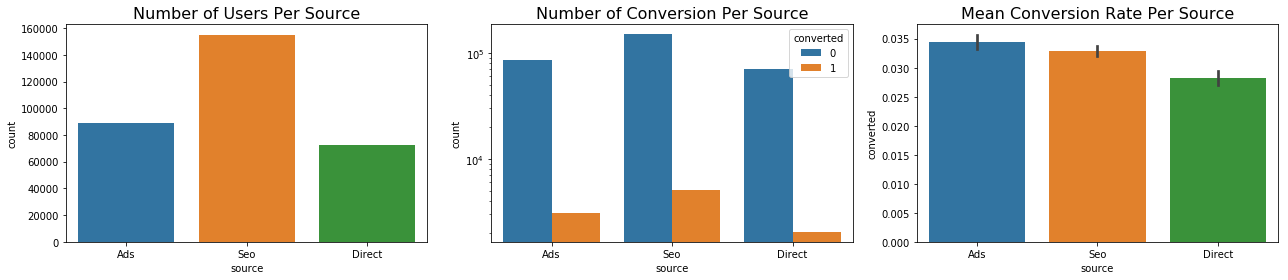

In [0]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18,4))

sns.countplot(x='source',data = df,ax = ax[0]) 
ax[0].set_title('Number of Users Per Source',fontsize = 16)

sns.countplot(x='source',hue='converted',data = df,ax = ax[1]) 
ax[1].set_title('Number of Conversion Per Source',fontsize = 16)
ax[1].set_yscale('log')
sns.barplot(x='source',y='converted',data = df,ax = ax[2])
ax[2].set_title('Mean Conversion Rate Per Source',fontsize = 16)
plt.tight_layout()
plt.show()

## Conversion rate by total_page_visited

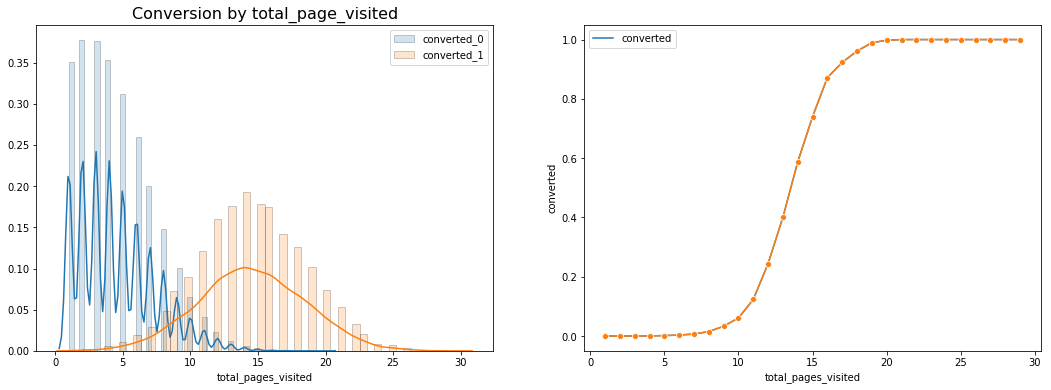

In [0]:
grouped = df[['converted','total_pages_visited']].groupby('total_pages_visited').mean().reset_index()

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,6)) 
hist_kws= {'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}  # alpha : transparency 
sns.distplot(df[df['converted']==0]['total_pages_visited'], label = 'converted_0', hist_kws=hist_kws, ax = ax[0])
sns.distplot(df[df['converted']==1]['total_pages_visited'], label = 'converted_1', hist_kws=hist_kws, ax = ax[0])
ax[0].legend()
ax[0].set_title('Conversion by total_page_visited',fontsize=16)
ax[1].plot(grouped['total_pages_visited'],grouped['converted'])
sns.lineplot(x=grouped['total_pages_visited'],y=grouped['converted'],data = grouped,ax=ax[1],marker='o')
# create plotted points on the line by passing 'o' to marker

# 4. Check Class Imbalance
why we do this: <br>
Machine Learning Algorithms are usually designed to improve accuracy by reducing the error. Thus, they do not take into account the class distribution / proportion or balance of classes. <br>
In our case, if algorithm blindly classify every record as 0 (unconverted), we still have accuracy rate as high as 306,000 / 316,200 = 96.77%, which looks high while biased.

0    306000
1     10198
Name: converted, dtype: int64

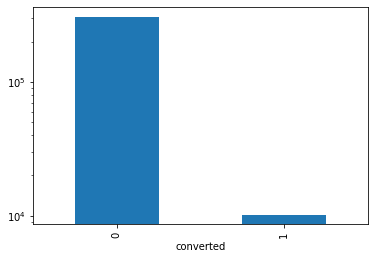

In [0]:
# show distribution
df['converted'].value_counts()
y = df.groupby(['converted']).size()
ax = y.plot(kind = 'bar')
plt.yscale('log')
plt.show()

### Finding:
Non-converted class is outnumbered by the converted class, occuring in only 3.23% of the users. This class imbalance will create misleading accuracy metrics, known as an accuracy paradox.

### My solution:
Up-sampling the minority class

In [0]:
# Separate majority and minority classes
df_majority = df[df.converted==0]
df_minority = df[df.converted==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=306000,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled['converted'].value_counts()

1    306000
0    306000
Name: converted, dtype: int64

# 5. Modeling

## Random Forest
## Why this model:
It's a good chioce when we want to learn more about the data before applying other complex algorithms.
Random forest a popular ensemble method which could be used in both regression and classification. It helps in dimensional reduction, treats missing values, outliers, continuous and discrete variables.



In [0]:
# Convert string categorical variables into numerical variables
# Define the string categorical columns
String_Categorical = ['country', 'source']

# Apply LabelEncoder to the categorical variables with text
for col in String_Categorical:
  le = LabelEncoder()
  df_upsampled[col] = le.fit_transform(df_upsampled[col])
  # Create additional dictionary with mapping
  le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
  print (le_name_mapping)

df_upsampled.head(5)

{'China': 0, 'Germany': 1, 'UK': 2, 'US': 3}
{'Ads': 0, 'Direct': 1, 'Seo': 2}


,country,age,new_user,source,total_pages_visited,converted
0,2,25,1,0,1,0
1,3,23,1,2,5,0
2,3,28,1,2,4,0
3,0,39,1,2,5,0
4,3,30,1,2,6,0


In [0]:
# Define the train and test data
train = df_upsampled.iloc[:, df_upsampled.columns != 'converted']
test  = df_upsampled.iloc[:, df_upsampled.columns == 'converted']

# Split the test and training data
x_train, x_test, y_train, y_test = train_test_split(train,
                                                   test,
                                                   test_size = 0.20, 
                                                  random_state = 15)

In [0]:
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

# Fit on training data
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#  Class predictions on training set
rf_train_predictions = model.predict(x_train)
#  Class predictions on testing set
rf_predictions = model.predict(x_test)
# Probabilities for each class
rf_probs = model.predict_proba(x_test)[:, 1]

# Result

In [0]:
# classification_report & confusion Matrix
# F1-score shows how balanced the data is, higher number means more balanced dataset
# Support counts number of occurrences of each class label

print('Classification report:')
print(classification_report(y_test, rf_predictions))
print('\n')
print('Confusion matrix for training set:')
print(pd.DataFrame(confusion_matrix(rf_train_predictions, y_train)))
print('Accuracy score for training set:',round(accuracy_score(rf_train_predictions, y_train),3))
print('\n')
print('Confusion matrix for testing set:')
print(pd.DataFrame(confusion_matrix(rf_predictions, y_test)))
print('Accuracy score for testing set:',round(accuracy_score(rf_predictions, y_test),3))

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     61305
           1       0.95      0.97      0.96     61095

    accuracy                           0.96    122400
   macro avg       0.96      0.96      0.96    122400
weighted avg       0.96      0.96      0.96    122400



Confusion matrix for training set:
        0       1
0  231946    7987
1   12749  236918
Accuracy score for training set: 0.958


Confusion matrix for testing set:
       0      1
0  57991   2122
1   3314  58973
Accuracy score for testing set: 0.956


### Finding:
1. Accuracy rate for training and testing sets are similiar: around 95%, no overfitting
2. Up-sampling created balanced data set, we can tell from F1-score and support.
    this make sure unbiased and accurate model result

In [0]:
# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.9920975575301092

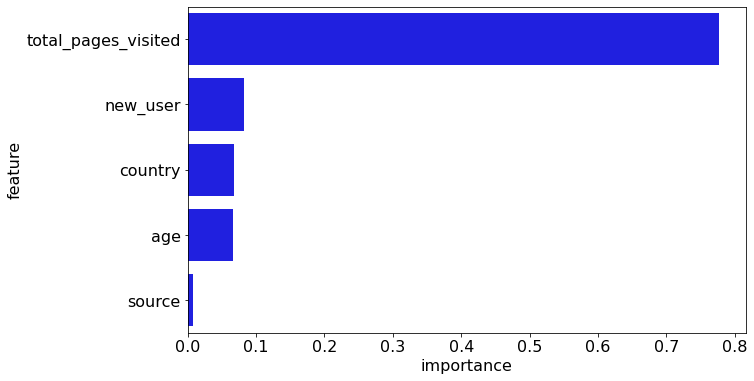

In [0]:
# Display feture importance of our model

# Extract the feature importances and zip it with the columns into a dataframe
features = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display a horizontal barplot with the feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=features['importance'], y=features['feature'], color='blue', orient='h')

### Finding:
total_pages_visited makes over 70% importance in the model, which makes common sense <br>
Since customers who want to buy items tend to view more pages and they need to click more pages to complete orders <br>
while from website improvement stand point, it is not actionable; <br>
Considering there is a huge difference between importance of total_pages_visited & age
So I will remove this feature and rebuild model<br>

In [0]:
# remove total_pages_visited from x_train & x_test
adjusted_x_train = x_train.iloc[:,x_train.columns != 'total_pages_visited']
adjusted_x_test = x_test.iloc[:,x_test.columns != 'total_pages_visited']

In [0]:
# Fit model on adjusted training data
model2 = model.fit(adjusted_x_train, y_train)

#  Class predictions on adjusted traing set
rf_adjusted_train_predictions = model.predict(adjusted_x_train)
#  Class predictions on testing set
rf_predictions = model.predict(adjusted_x_test)
# Probabilities for each class
rf_probs = model.predict_proba(adjusted_x_test)[:, 1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


<Figure size 720x432 with 0 Axes>

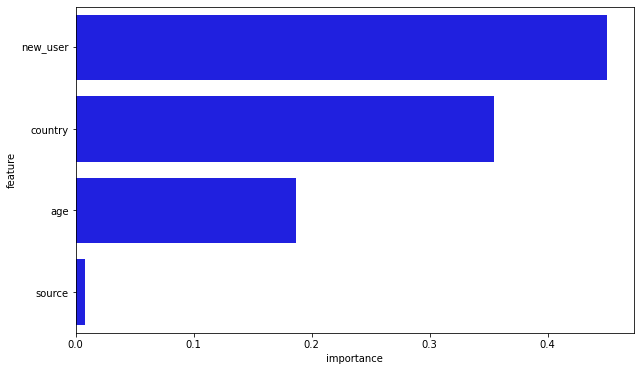

In [0]:
# Display feture importance of adjusted model

# Extract the feature importances and zip it with the columns into a dataframe
features_2 = pd.DataFrame({'feature': list(adjusted_x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display a horizontal barplot with the feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=features_2['importance'], y=features_2['feature'], color='blue', orient='h')

In [0]:
list(features_2['feature'])

['new_user', 'country', 'age', 'source']

<Figure size 1296x432 with 0 Axes>

Text(0.5, 0.98, 'Partial dependence of conversion behavior')

<Figure size 1296x432 with 0 Axes>

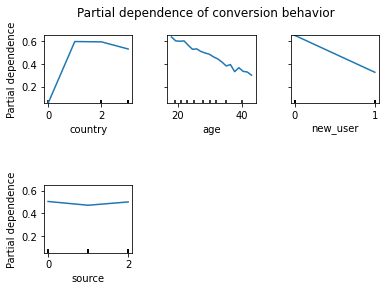

In [0]:
# open this 'black box' and uncover insights from our model using partial dependence plot
# it captures complex patterns and shows how each variable or predictor affects the model's predictions

plt.figure(figsize=(18,6))
plot_partial_dependence(model2, adjusted_x_train, adjusted_x_train.columns, n_jobs=3, grid_resolution=20)
fig = plt.gcf()
fig.suptitle('Partial dependence of conversion behavior')
fig.subplots_adjust(wspace=0.4, hspace=1.2)
plt.show()


{'China': 0, 'Germany': 1, 'UK': 2, 'US': 3}
{'Ads': 0, 'Direct': 1, 'Seo': 2}

Partial dependence plot shows how much of conversion differences among our 4 target countries are due solely to country.
Inside of this method is: first we choose the first user in dataset, keeping all other variables constant, apply 
We then use our model to predict the conversion rate, but we only change the country keeping all other variables constant before making a prediction. We first predict conversion with country is China, then predict with country is Germany, then UK, then US. For all the users in our table, we repeat this process, then get average trend.


# Summary
**Our Strengths:**
1. Retened/loyal customers play an critical role in sales. Keep maintaining high quality customer service and periodic campaigns will help boost retention.
2. User base is young and mainly under 30. Marketing channels which most likely to reach out young people will be our key to maintain succuess.

**Our Opportunities:**
3. More advertiseing and exposure in Germany market to target more Germans. Germany gets highest conversion rate among 4 contries. Even though only 3% of the users are Germans, their mean conversion rate is as high as 6%.
4. Optimize recommendation system. Users who either are new or visited less than 10 pages of our websiter are more inclined to quit. For this segment, customized recommendation could be the key to drive conversion.
5. People over 30 have huge potential since consumer expenditure usually increase with age. Consumer from 30 to 50 have highest income level and expenditure compared to other groups. Marketing team could design and conduct experienment to analyze perference of this custoemr segment and position right products and service for this group of customers.

**Our Weaknesses:**
6. Need to update China version website. Both EDA and partial dependence plot show low conversion rate in China. Giving large population and user base in this country, we need to improve our performance. UI design team could test why local version in China doesn't work well. Perhaps translation doesn't aligh with local culture and customer habit. Marketing could help conduct experiments to enhance user experience.

**Others:**
7. Source doesn't seem to matter. There is no difference among different sources. 



### Reference
https://towardsdatascience.com/three-model-explanability-methods-every-data-scientist-should-know-c332bdfd8df <br>
https://www.kaggle.com/dansbecker/partial-dependence-plots<br>
https://github.com/huynhe/Data-Science-Take-Home-Challenges-Collection/blob/master/Conversion%20Rate.ipynb<br>
https://elitedatascience.com/imbalanced-classes <br>
https://www.kaggle.com/raviolli77/random-forest-in-python